In [1]:
using HDF5, FFTW
using PyPlot
# pyplot()

┌ Info: Recompiling stale cache file /home/karel/.julia/compiled/v1.0/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184


UndefVarError: UndefVarError: pyplot not defined

In [2]:
arxname="../JLDFiles/Deshinibida/180116s1/180116s1cut_evento_1.h5"

"../JLDFiles/Deshinibida/180116s1/180116s1cut_evento_1.h5"

In [3]:
arx=h5open(arxname)

HDF5 data file: ../JLDFiles/Deshinibida/180116s1/180116s1cut_evento_1.h5

In [4]:
names(arx)

7-element Array{String,1}:
 "CMPNeg"          
 "CMPos"           
 "CSDLindenberg"   
 "CanalesSaturados"
 "Canalesrespuesta"
 "LFPTotal"        
 "freq"            

Todos los tiempos estan en cuadros, esto es, en 1/freq de segundo. Para las transformadas de Fourier (o graficas bonitas) tenemos que multiplicar los rangos por los factores adecuados.

In [5]:
lfp=read(arx, "LFPTotal")
saturados=read(arx, "CanalesSaturados")
buenos=read(arx, "Canalesrespuesta")
freq=read(arx, "freq")
#late=read(arx, "latencia")
#fin=read(arx,"final")
#retrazo=read(arx,"retrazo")
#println(freq, " ", late, " ", fin , " ", retrazo )

7.022058198545425

In [6]:
nmax=size(lfp)[3]

2001

In [7]:
iniact=retrazo+late # Retrazo + latencia = inicio de señal

UndefVarError: UndefVarError: retrazo not defined

In [8]:
#rango=iniact:fin
rango=1:nmax

1:2001

In [9]:
buenos

863×2 Array{Int64,2}:
 38   5
 44   3
 53  36
 57  23
 56  30
 32  19
 38   6
 45   8
  4  32
 48  34
 54  28
 42  42
 43  38
  ⋮    
 51  30
 53  20
 44  26
 35  10
 28  16
 41  26
 30  14
 29   5
 59  28
 37  18
 44  28
 43  28

In [10]:
ejemplolfp=lfp[45,8,:];

In [24]:
tmax=nmax/freq
rangotiempos=rango./freq
rangofreqs=rango./tmax
rfreqsim=map(x->-freq/2+(x-1)*freq/(nmax-1),rango);
rfreqsim[1001]

0.0

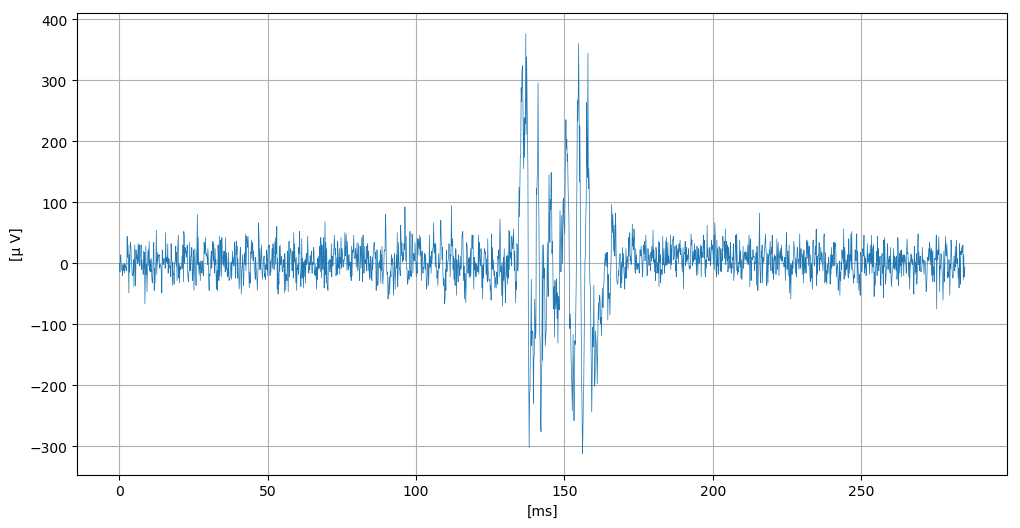

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f210837def0>

In [25]:
figura=figure(figsize=(12,6))
grid()
xlabel("[ms]")
ylabel("[μ V]")
plot(rangotiempos, ejemplolfp, lw=0.5)

In [40]:
plan=plan_fft(ejemplolfp)
fttotal=(plan*ejemplolfp);
ftsym=circshift(fttotal, div(nmax,2));

In [41]:
epoder=map(abs2, ftsym);

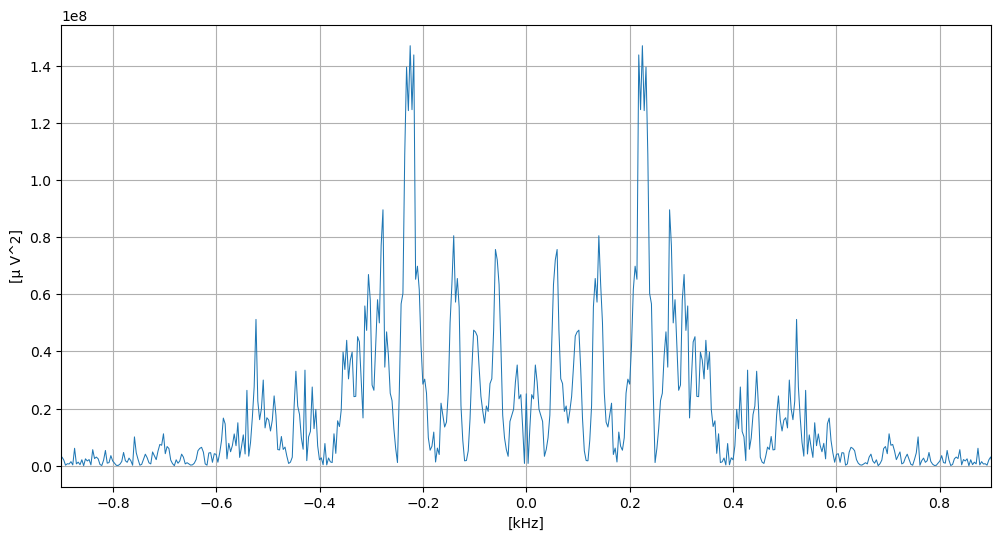

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f2107533278>

In [47]:
figura=figure(figsize=(12,6))
grid()
xlim(-0.9,0.9)
xlabel("[kHz]")
ylabel("[μ V^2]")
#yscale("log")
mediorango=1:500
plot(rfreqsim,epoder, lw=0.74)
#plot(rangofreqs[mediorango],epoder2[mediorango])

In [42]:
ftcacho2=plan*cacho2
epoder2=map(abs2, ftcacho2);

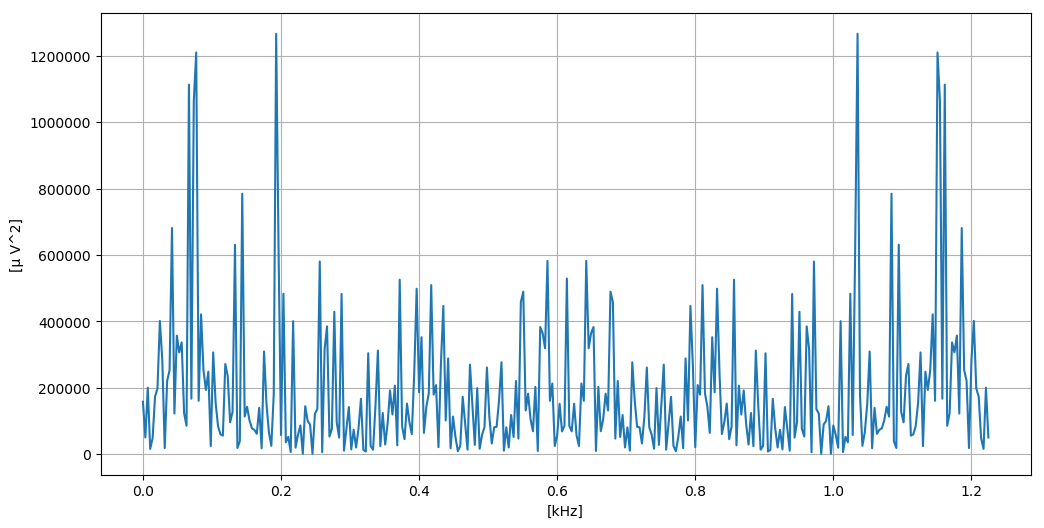

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f23d7f1bac8>

In [48]:
figura=figure(figsize=(12,6))
grid()
xlabel("[kHz]")
ylabel("[μ V^2]")
plot(subfreqs,epoder2)